# 1. Business Understanding 

## Introduction  
This project seeks to analyze Airbnb listings and reviews in Nairobi City, Kenya, with the goal of uncovering the key determinants of revenue and guest satisfaction. To achieve this, the project will combine structured data modeling with Natural Language Processing (NLP) techniques. Specifically, it will:  
- Build a price prediction model.  
- Extract topics from customer reviews.  
- Perform sentiment analysis for actionable insights.  

By integrating both numerical and textual data, the analysis will provide a holistic understanding of Airbnb performance in Nairobi.  

---

## Business Understanding  
The central research question guiding this project is:  

**“What are the key determinants of revenue and customer satisfaction in Airbnb?”**  

The choice of this topic is informed by recent findings that Airbnb is becoming a trendy and lucrative investment in Kenya (Riungu, Kamwea, Imbaya, Akunja, & Kiama, 2025). Consequently, there is a growing need to provide investors and customers with data-driven projections and insights in this fast-growing sector.  

This project is highly relevant to the real estate industry. Its target audience includes:  
- **Investors in the Airbnb industry** – who will benefit from insights into ideal locations, potential return on investment (ROI), and prevailing price ranges.  
- **Guests booking through Airbnb** – who will gain useful knowledge on safe neighborhoods, trustworthy hosts, and market-level price expectations.  

The model will serve as a decision-support tool for both groups. For investors, it will guide property acquisition or leasing decisions, while for guests it will highlight factors driving satisfaction.  

Pre-existing research in this field has been explored, including:  
- *Capstone Project – Airbnb Cape Town Business Analysis* by Salrahim21.  
- *Airbnb Investment Project* by amtherwi.  

The motivation behind this project lies in the desire to deliver a practical solution to investors eyeing the Airbnb market boom in Nairobi. The analysis will provide ROI expectations based on location, customer reviews, and prevailing market conditions, thereby offering a data-informed roadmap for stakeholders in this sector.  


# 2. Data Understanding 

## 2.1 Import Libraries 

In [178]:
# ====== Data Handling ======
import pandas as pd
import numpy as np
import ast
from collections import Counter

# ====== Visualization ======
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# ====== Preprocessing ======
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer, PowerTransformer, QuantileTransformer

# ====== Regression & Tree Models ======
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.model_selection import KFold
from scipy.stats import randint, uniform

# ====== Clustering ======
from sklearn.cluster import KMeans

# ====== Correlation & Statistics ======
from scipy.stats import pearsonr, spearmanr

# ====== NLP ======
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from bertopic import BERTopic

# ====== Geospatial ======
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from shapely.geometry import Point
from branca.element import Template, MacroElement, Element


# ====== Utilities ======
import warnings
warnings.filterwarnings("ignore")
import joblib
from joblib import dump
import pickle


from scipy.stats import randint, uniform

## 2.2 Loading the Data 

In [179]:
# Load the new datasets
future_calendar = pd.read_csv("Data/Future Calendar Rates.csv")
listings_v2 = pd.read_csv("Data/Listings (2).csv")
past_calendar = pd.read_csv("Data/Past Calendar Rates.csv")
reviews_v2 = pd.read_csv("Data/Reviews (2).csv")

# 3. Data Understanding 

### 3.1 check the first 5 rows of each data

In [180]:
# Display the first 5 rows of the future_calendar dataset
future_calendar.head()

listing_id        date  vacant_days  reserved_days  occupancy  revenue  \
0    41759384  2025-11-01           30              0        0.0      0.0   
1    14535080  2026-01-01           31              0        0.0      0.0   
2    41759384  2026-07-01           31              0        0.0      0.0   
3    14535080  2025-12-01           31              0        0.0      0.0   
4    14535080  2026-08-01           31              0        0.0      0.0   

   rate_avg  booked_rate_avg  booking_lead_time_avg  length_of_stay_avg  \
0      54.0              NaN                    NaN                 NaN   
1       9.7              NaN                    NaN                 NaN   
2      53.5              NaN                    NaN                 NaN   
3       9.7              NaN                    NaN                 NaN   
4      10.3              NaN                    NaN                 NaN   

   min_nights_avg  native_booked_rate_avg  native_rate_avg  native_revenue  
0             2.0                     NaN           6977.0             0.0  
1            28.0                     NaN           1253.0             0.0  
2             NaN                     NaN           6912.0             0.0  
3            28.0                     NaN           1253.0             0.0  
4            28.0                     NaN           1331.0             0.0

In [181]:
# Display the first 5 rows of the listings_v2 dataset
listings_v2.head()

listing_id                                   listing_name  \
0      471581                Located In a Serene Environment   
1      906958           Makena's Place Karen - Flamingo Room   
2     1023556  Home in Langata 1 km to Nairobi National Park   
3     1237886                                      Hob House   
4     1803821               Makena's Place Karen - All Rooms   

                listing_type     room_type  \
0             Entire cottage   entire_home   
1    Private room in cottage  private_room   
2          Entire guesthouse   entire_home   
3  Room in bed and breakfast    hotel_room   
4    Private room in cottage  private_room   

                                     cover_photo_url  photos_count  host_id  \
0  https://a0.muscache.com/im/pictures/6434524/bc...            37  2280941   
1  https://a0.muscache.com/im/pictures/68ecc57f-d...            29  4856316   
2  https://a0.muscache.com/im/pictures/01cc7287-2...            20  5634522   
3  https://a0.muscache.com/im/pictures/cbdab7e1-f...             8  6748840   
4  https://a0.muscache.com/im/pictures/786899c5-b...            58  4856316   

  host_name cohost_ids cohost_names  ...  l90d_occupancy  \
0     Bella        NaN          NaN  ...           0.500   
1    Chichi        NaN          NaN  ...           0.111   
2     Janet        NaN          NaN  ...           0.044   
3       NaN        NaN          NaN  ...           0.056   
4    Chichi        NaN          NaN  ...           0.044   

   l90d_adjusted_occupancy  l90d_revpar  l90d_revpar_native  \
0                    0.726         20.1              2594.2   
1                    0.147          5.8               753.7   
2                    0.000          0.9               112.0   
3                    0.000          6.9               890.1   
4                    0.055          5.6               727.9   

   l90d_adjusted_revpar  l90d_adjusted_revpar_native  l90d_reserved_days  \
0                  29.1                       3765.7                  45   
1                   7.7                        997.5                  10   
2                   0.0                          0.0                   4   
3                   0.0                          0.0                   5   
4                   6.9                        897.4                   4   

  l90d_blocked_days l90d_available_days l90d_total_days  
0                28                  45              90  
1                22                  80              90  
2                 0                  86              90  
3                 0                  85              90  
4                17                  86              90  

[5 rows x 61 columns]

In [182]:
# Display the first 5 rows of the past_calendar dataset
past_calendar.head()

listing_id        date  vacant_days  reserved_days  occupancy  revenue  \
0    21520917  2024-12-01           22              9       0.29    345.0   
1    39875956  2025-08-01           31              0       0.00      0.0   
2    36253079  2025-04-01           30              0       0.00      0.0   
3    40675899  2024-09-01           24              6       0.20    243.0   
4    21520917  2025-01-01           31              0       0.00      0.0   

   rate_avg  booked_rate_avg  booking_lead_time_avg  length_of_stay_avg  \
0      37.6             38.3                    5.0                 9.0   
1      69.1              NaN                    NaN                 NaN   
2      33.7              NaN                    NaN                 NaN   
3      40.2             40.5                    1.0                 9.0   
4      37.2              NaN                    NaN                 NaN   

   min_nights_avg  native_booked_rate_avg  native_rate_avg  native_revenue  
0             NaN                  4960.0           4869.0         44680.0  
1             1.0                     NaN           8928.0             0.0  
2             1.0                     NaN           4364.0             0.0  
3             NaN                  5232.0           5193.0         31391.0  
4             1.0                     NaN           4805.0             0.0

In [232]:
# Display the first 5 rows of the past_calendar dataset
reviews_v2.head(10)

listing_id       date  num_reviews  \
0    16701882 2025-04-01            1   
1    37808882 2025-05-01            1   
2    13381106 2024-10-01            3   
3    37808882 2025-07-01            1   
4      471581 2025-06-01            1   
5    13381106 2025-08-01            3   
6    13381106 2025-01-01            8   
7    35850895 2025-02-01            1   
8    13381106 2025-06-01            3   
9    16701882 2025-02-01            1   

                                           reviewers  
0                                        341960500.0  
1                                        424270789.0  
2                         5995258,172444062,74140354  
3                                        381061119.0  
4                                        138579311.0  
5                          26897960,78235546,6627815  
6  40567166,28631497,70874775,38945765,4627116,67...  
7                                        367246627.0  
8                        435003168,22881338,79058089  
9                                        375297007.0

### 3.2 check the columns and the shape of the data 

In [184]:
# Check shape and columns for each dataset
datasets = {
    "future_calendar": future_calendar,
    "listings_v2": listings_v2,
    "past_calendar": past_calendar,
    "reviews_v2": reviews_v2
}

for name, df in datasets.items():
    print(f"\n{name}:")
    print(f"Shape: {df.shape}")
    print("Columns:", df.columns.tolist())



future_calendar:
Shape: (3480, 14)
Columns: ['listing_id', 'date', 'vacant_days', 'reserved_days', 'occupancy', 'revenue', 'rate_avg', 'booked_rate_avg', 'booking_lead_time_avg', 'length_of_stay_avg', 'min_nights_avg', 'native_booked_rate_avg', 'native_rate_avg', 'native_revenue']

listings_v2:
Shape: (300, 61)
Columns: ['listing_id', 'listing_name', 'listing_type', 'room_type', 'cover_photo_url', 'photos_count', 'host_id', 'host_name', 'cohost_ids', 'cohost_names', 'superhost', 'latitude', 'longitude', 'guests', 'bedrooms', 'beds', 'baths', 'registration', 'amenities', 'instant_book', 'min_nights', 'cancellation_policy', 'currency', 'cleaning_fee', 'extra_guest_fee', 'num_reviews', 'rating_overall', 'rating_accuracy', 'rating_checkin', 'rating_cleanliness', 'rating_communication', 'rating_location', 'rating_value', 'ttm_revenue', 'ttm_revenue_native', 'ttm_avg_rate', 'ttm_avg_rate_native', 'ttm_occupancy', 'ttm_adjusted_occupancy', 'ttm_revpar', 'ttm_revpar_native', 'ttm_adjusted_rev

### 3.3 Summary Statistics 

In [185]:
# Summary statistics for each dataset
print("📊 Future Calendar Summary\n", future_calendar.describe(include='all').T)
print("\n📊 Listings Summary\n", listings_v2.describe(include='all').T)
print("\n📊 Past Calendar Summary\n", past_calendar.describe(include='all').T)
print("\n📊 Reviews Summary\n", reviews_v2.describe(include='all').T)

📊 Future Calendar Summary
                          count unique         top freq             mean  \
listing_id              3480.0    NaN         NaN  NaN  27742328.955172   
date                      3480     12  2025-11-01  290              NaN   
vacant_days             3480.0    NaN         NaN  NaN        28.672414   
reserved_days           3480.0    NaN         NaN  NaN         1.744253   
occupancy               3480.0    NaN         NaN  NaN         0.057449   
revenue                 3480.0    NaN         NaN  NaN       100.619828   
rate_avg                3480.0    NaN         NaN  NaN        57.618218   
booked_rate_avg          389.0    NaN         NaN  NaN        73.882005   
booking_lead_time_avg    243.0    NaN         NaN  NaN       124.893004   
length_of_stay_avg       243.0    NaN         NaN  NaN        18.255144   
min_nights_avg          3283.0    NaN         NaN  NaN         2.353945   
native_booked_rate_avg   389.0    NaN         NaN  NaN       9545.81491  

### 3.4 Check for Missing Values in both Counts and Percentage 

In [186]:
# Function to check missing values in count and percentage
def missing_values_summary(df):
    missing_count = df.isnull().sum()
    missing_percent = (missing_count / len(df)) * 100
    missing_summary = pd.DataFrame({
        'Missing Count': missing_count,
        'Missing Percentage': missing_percent.round(2)
    })
    return missing_summary[missing_summary['Missing Count'] > 0].sort_values(by='Missing Count', ascending=False)

# Check missing values for each dataset
print("Future Calendar Missing Values:")
display(missing_values_summary(future_calendar))

print("\nListings_v2 Missing Values:")
display(missing_values_summary(listings_v2))

print("\nPast Calendar Missing Values:")
display(missing_values_summary(past_calendar))

print("\nReviews_v2 Missing Values:")
display(missing_values_summary(reviews_v2))


Future Calendar Missing Values:


Missing Count  Missing Percentage
booking_lead_time_avg            3237               93.02
length_of_stay_avg               3237               93.02
booked_rate_avg                  3091               88.82
native_booked_rate_avg           3091               88.82
min_nights_avg                    197                5.66


Listings_v2 Missing Values:


Missing Count  Missing Percentage
cohost_names                    225               75.00
cohost_ids                      225               75.00
bedrooms                         51               17.00
guests                           42               14.00
instant_book                     23                7.67
extra_guest_fee                  21                7.00
rating_value                     10                3.33
rating_accuracy                  10                3.33
rating_location                  10                3.33
rating_communication             10                3.33
rating_cleanliness               10                3.33
rating_checkin                   10                3.33
rating_overall                   10                3.33
host_name                         4                1.33
registration                      3                1.00
beds                              3                1.00
cleaning_fee                      2                0.67
min_nights                        2                0.67
cancellation_policy               1                0.33


Past Calendar Missing Values:


Missing Count  Missing Percentage
booking_lead_time_avg            1874               52.91
length_of_stay_avg               1874               52.91
booked_rate_avg                  1667               47.06
native_booked_rate_avg           1667               47.06
min_nights_avg                   1162               32.81


Reviews_v2 Missing Values:


Empty DataFrame
Columns: [Missing Count, Missing Percentage]
Index: []

### 3.5 Check for unique values 

In [187]:
# Function to check unique values per column
def unique_values_summary(df):
    unique_counts = df.nunique()
    unique_summary = pd.DataFrame({
        'Unique Values Count': unique_counts
    })
    return unique_summary.sort_values(by='Unique Values Count', ascending=False)

# ================================
# Check unique values per dataset
# ================================

print("🔹 Future Calendar Unique Values:")
display(unique_values_summary(future_calendar))

print("\n🔹 Listings_v2 Unique Values:")
display(unique_values_summary(listings_v2))

print("\n🔹 Past Calendar Unique Values:")
display(unique_values_summary(past_calendar))

print("\n🔹 Reviews_v2 Unique Values:")
display(unique_values_summary(reviews_v2))


🔹 Future Calendar Unique Values:


Unique Values Count
rate_avg                               1033
native_rate_avg                        1033
revenue                                 352
native_revenue                          352
booked_rate_avg                         302
native_booked_rate_avg                  302
listing_id                              290
booking_lead_time_avg                   159
occupancy                                59
length_of_stay_avg                       49
vacant_days                              31
reserved_days                            30
date                                     12
min_nights_avg                           10


🔹 Listings_v2 Unique Values:


Unique Values Count
listing_id                           300
ttm_revpar_native                    300
ttm_avg_rate_native                  300
ttm_revenue_native                   300
listing_name                         299
...                                  ...
registration                           2
superhost                              2
ttm_total_days                         1
currency                               1
l90d_total_days                        1

[61 rows x 1 columns]


🔹 Past Calendar Unique Values:


Unique Values Count
native_rate_avg                        2368
native_revenue                         1681
native_booked_rate_avg                 1468
rate_avg                               1061
revenue                                1043
booked_rate_avg                         822
listing_id                              300
booking_lead_time_avg                   169
occupancy                                87
length_of_stay_avg                       58
vacant_days                              32
reserved_days                            32
min_nights_avg                           15
date                                     12


🔹 Reviews_v2 Unique Values:


Unique Values Count
reviewers                    975
listing_id                   242
date                          12
num_reviews                   10

### 3.6 Check data types 

In [188]:
# Function to check data types
def datatypes_summary(df):
    dtypes_summary = pd.DataFrame({
        'Data Type': df.dtypes,
        'Non-Null Count': df.notnull().sum(),
        'Null Count': df.isnull().sum()
    })
    return dtypes_summary

# ================================
# Check data types per dataset
# ================================

print("🔹 Future Calendar Data Types:")
display(datatypes_summary(future_calendar))

print("\n🔹 Listings_v2 Data Types:")
display(datatypes_summary(listings_v2))

print("\n🔹 Past Calendar Data Types:")
display(datatypes_summary(past_calendar))

print("\n🔹 Reviews_v2 Data Types:")
display(datatypes_summary(reviews_v2))



🔹 Future Calendar Data Types:


Data Type  Non-Null Count  Null Count
listing_id                 int64            3480           0
date                      object            3480           0
vacant_days                int64            3480           0
reserved_days              int64            3480           0
occupancy                float64            3480           0
revenue                  float64            3480           0
rate_avg                 float64            3480           0
booked_rate_avg          float64             389        3091
booking_lead_time_avg    float64             243        3237
length_of_stay_avg       float64             243        3237
min_nights_avg           float64            3283         197
native_booked_rate_avg   float64             389        3091
native_rate_avg          float64            3480           0
native_revenue           float64            3480           0


🔹 Listings_v2 Data Types:


Data Type  Non-Null Count  Null Count
listing_id                      int64             300           0
listing_name                   object             300           0
listing_type                   object             300           0
room_type                      object             300           0
cover_photo_url                object             300           0
...                               ...             ...         ...
l90d_adjusted_revpar_native   float64             300           0
l90d_reserved_days              int64             300           0
l90d_blocked_days               int64             300           0
l90d_available_days             int64             300           0
l90d_total_days                 int64             300           0

[61 rows x 3 columns]


🔹 Past Calendar Data Types:


Data Type  Non-Null Count  Null Count
listing_id                 int64            3542           0
date                      object            3542           0
vacant_days                int64            3542           0
reserved_days              int64            3542           0
occupancy                float64            3542           0
revenue                  float64            3542           0
rate_avg                 float64            3542           0
booked_rate_avg          float64            1875        1667
booking_lead_time_avg    float64            1668        1874
length_of_stay_avg       float64            1668        1874
min_nights_avg           float64            2380        1162
native_booked_rate_avg   float64            1875        1667
native_rate_avg          float64            3542           0
native_revenue           float64            3542           0


🔹 Reviews_v2 Data Types:


Data Type  Non-Null Count  Null Count
listing_id      int64             997           0
date           object             997           0
num_reviews     int64             997           0
reviewers      object             997           0

# 4. Data Cleaning 

1. **Remove duplicates:** Ensures each row is unique.  
2. **Handle missing values:**  
   - Categorical/text columns → fill with `"Unknown"` and standardize text.  
   - Numeric columns → fill with the median value.  
   - Date columns → fill with the earliest date.  
3. **Convert data types:**  
   - Columns containing "date" → converted to datetime format.  
   - Numeric-looking strings → converted to numeric types where possible.  

The function is applied to all datasets (`future_calendar`, `listings_v2`, `past_calendar`, `reviews_v2`) to standardize and prepare them for analysis.

In [189]:
# ==============
# Data Cleaning
# ===============

def clean_df(df, dataset_name):
    print(f"\n🔹Cleaning {dataset_name}...")
    
    #print("\n--- Before Cleaning ---")
    #display(datatypes_summary(df))
    
    # 1. Remove duplicates
    df = df.drop_duplicates()
    print(f"Removed duplicates → New shape: {df.shape}")
    
    # 2. Handling missing values
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = (
                df[col]
                .fillna("Unknown")
                .astype(str)
                .str.strip()
                .str.lower()
                .str.replace(r"\s+", " ", regex=True)
            )
        elif pd.api.types.is_numeric_dtype(df[col]):
            df[col] = df[col].fillna(df[col].median())
        elif pd.api.types.is_datetime64_any_dtype(df[col]):
            df[col] = df[col].fillna(df[col].min())
            
    # 3. Convert data types
    for col in df.columns:
        # Convert object columns that look like dates
        if "date" in col.lower() or pd.api.types.is_datetime64_dtype(df[col]):
                converted = pd.to_datetime(df[col], errors="coerce")
                if converted.notnull().sum() > 0: # only replace if some values converted
                    df[col] = converted
                    
        # Convert numeric looking strings
        if df[col].dtype == 'object':
            converted = pd.to_numeric(df[col], errors="coerce")
            if converted.notnull().sum() > 0:
                df[col] = converted.fillna(df[col])
                
    print(f"Finished cleaning {dataset_name}.")
    #print(f"Remaining nulls: {df.isnull().sum()} total") 
    
    #print("\n--- After Cleaning ---")
    return df         

In [190]:
# Applying cleaning function to each dataset
future_calendar = clean_df(future_calendar, "Future Calendar")
listings_v2 = clean_df(listings_v2, "Listings")
past_calendar = clean_df(past_calendar, "Past Calendar")
reviews_v2 = clean_df(reviews_v2, "Reviews")


🔹Cleaning Future Calendar...
Removed duplicates → New shape: (3480, 14)
Finished cleaning Future Calendar.

🔹Cleaning Listings...
Removed duplicates → New shape: (300, 61)
Finished cleaning Listings.

🔹Cleaning Past Calendar...
Removed duplicates → New shape: (3542, 14)
Finished cleaning Past Calendar.

🔹Cleaning Reviews...
Removed duplicates → New shape: (997, 4)
Finished cleaning Reviews.


In [191]:
import pandas as pd

# Ensure the date column is datetime
past_calendar['date'] = pd.to_datetime(past_calendar['date'], errors='coerce')
future_calendar['date'] = pd.to_datetime(future_calendar['date'], errors='coerce')

# Extract day of week
past_calendar['day_of_week'] = past_calendar['date'].dt.day_name()
future_calendar['day_of_week'] = future_calendar['date'].dt.day_name()

# Now merge with listings or each other
calendar_all = pd.concat([past_calendar, future_calendar], axis=0)


In [192]:
# Ensure 'day_of_week' exists in both calendars
past_calendar['day_of_week'] = pd.to_datetime(past_calendar['date'], errors='coerce').dt.day_name()
future_calendar['day_of_week'] = pd.to_datetime(future_calendar['date'], errors='coerce').dt.day_name()

# Count of each day in past_calendar
past_dow_counts = past_calendar['day_of_week'].value_counts().sort_index()
print("Past Calendar - Day of Week Counts:")
print(past_dow_counts)

# Count of each day in future_calendar
future_dow_counts = future_calendar['day_of_week'].value_counts().sort_index()
print("\nFuture Calendar - Day of Week Counts:")
print(future_dow_counts)


Past Calendar - Day of Week Counts:
day_of_week
Friday       589
Saturday     598
Sunday       888
Thursday     290
Tuesday      878
Wednesday    299
Name: count, dtype: int64

Future Calendar - Day of Week Counts:
day_of_week
Friday       290
Monday       870
Saturday     580
Sunday       580
Thursday     290
Wednesday    870
Name: count, dtype: int64


### 4.1 Merge the Data 

1. **Merge reviews into listings:**  
   - `listings_v2` is joined with `reviews_v2` on `listing_id` using a left join to keep all listings.  

2. **Combine past and future calendars:**  
   - `past_calendar` and `future_calendar` are concatenated vertically to form a complete calendar dataset.  

3. **Merge calendar with listings + reviews:**  
   - The combined calendar is merged with `listings_reviews` on `listing_id` using a left join to create `master_df`. 

In [193]:
# 1. Merge reviews into listings
listings_reviews = listings_v2.merge(reviews_v2, on="listing_id", how="left")

# 2. Combine past and future calendar
calendar_all = pd.concat([past_calendar, future_calendar], axis=0)

# 3. Merge calendar with listings + reviews
master_df = listings_reviews.merge(calendar_all, on="listing_id", how="left")

# 4. Check result
print("Master dataset shape:", master_df.shape)
print("Master dataset columns:", master_df.columns.tolist())


Master dataset shape: (25117, 78)
Master dataset columns: ['listing_id', 'listing_name', 'listing_type', 'room_type', 'cover_photo_url', 'photos_count', 'host_id', 'host_name', 'cohost_ids', 'cohost_names', 'superhost', 'latitude', 'longitude', 'guests', 'bedrooms', 'beds', 'baths', 'registration', 'amenities', 'instant_book', 'min_nights', 'cancellation_policy', 'currency', 'cleaning_fee', 'extra_guest_fee', 'num_reviews_x', 'rating_overall', 'rating_accuracy', 'rating_checkin', 'rating_cleanliness', 'rating_communication', 'rating_location', 'rating_value', 'ttm_revenue', 'ttm_revenue_native', 'ttm_avg_rate', 'ttm_avg_rate_native', 'ttm_occupancy', 'ttm_adjusted_occupancy', 'ttm_revpar', 'ttm_revpar_native', 'ttm_adjusted_revpar', 'ttm_adjusted_revpar_native', 'ttm_reserved_days', 'ttm_blocked_days', 'ttm_available_days', 'ttm_total_days', 'l90d_revenue', 'l90d_revenue_native', 'l90d_avg_rate', 'l90d_avg_rate_native', 'l90d_occupancy', 'l90d_adjusted_occupancy', 'l90d_revpar', 'l90d_

In [194]:
# Count of missing values per column
missing_count = master_df.isna().sum()

# Percentage of missing values per column
missing_percent = (missing_count / len(master_df)) * 100

# Combine into a single DataFrame for easier view
missing_summary = pd.DataFrame({
    "missing_count": missing_count,
    "missing_percent": missing_percent
}).sort_values(by="missing_percent", ascending=False)

print(missing_summary)


                      missing_count  missing_percent
date_x                         1273          5.06828
num_reviews_y                  1273          5.06828
reviewers                      1273          5.06828
listing_id                        0          0.00000
l90d_avg_rate_native              0          0.00000
...                             ...              ...
num_reviews_x                     0          0.00000
extra_guest_fee                   0          0.00000
cleaning_fee                      0          0.00000
currency                          0          0.00000
day_of_week                       0          0.00000

[78 rows x 2 columns]


In [195]:
import pandas as pd

# 1. Drop rows with missing 'date_x' (necessary for time-based analysis)
master_df = master_df.dropna(subset=['date_x'])

# 2. Fill missing review-related columns
master_df['num_reviews_y'] = master_df['num_reviews_y'].fillna(0)
master_df['reviewers'] = master_df['reviewers'].fillna('')

# 3. Ensure 'day_of_week' exists and is consistent
master_df['day_of_week'] = pd.to_datetime(master_df['date_x'], errors='coerce').dt.day_name()

# 4. Optional: reset index
master_df = master_df.reset_index(drop=True)

# 5. Verify missing values are handled
missing_summary = pd.DataFrame({
    'missing_count': master_df.isna().sum(),
    'missing_percent': (master_df.isna().sum() / len(master_df)) * 100
}).sort_values(by='missing_percent', ascending=False)

print(missing_summary)


                             missing_count  missing_percent
listing_id                               0              0.0
l90d_avg_rate                            0              0.0
l90d_adjusted_revpar_native              0              0.0
l90d_adjusted_revpar                     0              0.0
l90d_revpar_native                       0              0.0
...                                    ...              ...
num_reviews_x                            0              0.0
extra_guest_fee                          0              0.0
cleaning_fee                             0              0.0
currency                                 0              0.0
day_of_week                              0              0.0

[78 rows x 2 columns]


# 5. Exploratory Data Analysis

### 5.1 Univariate Analysis

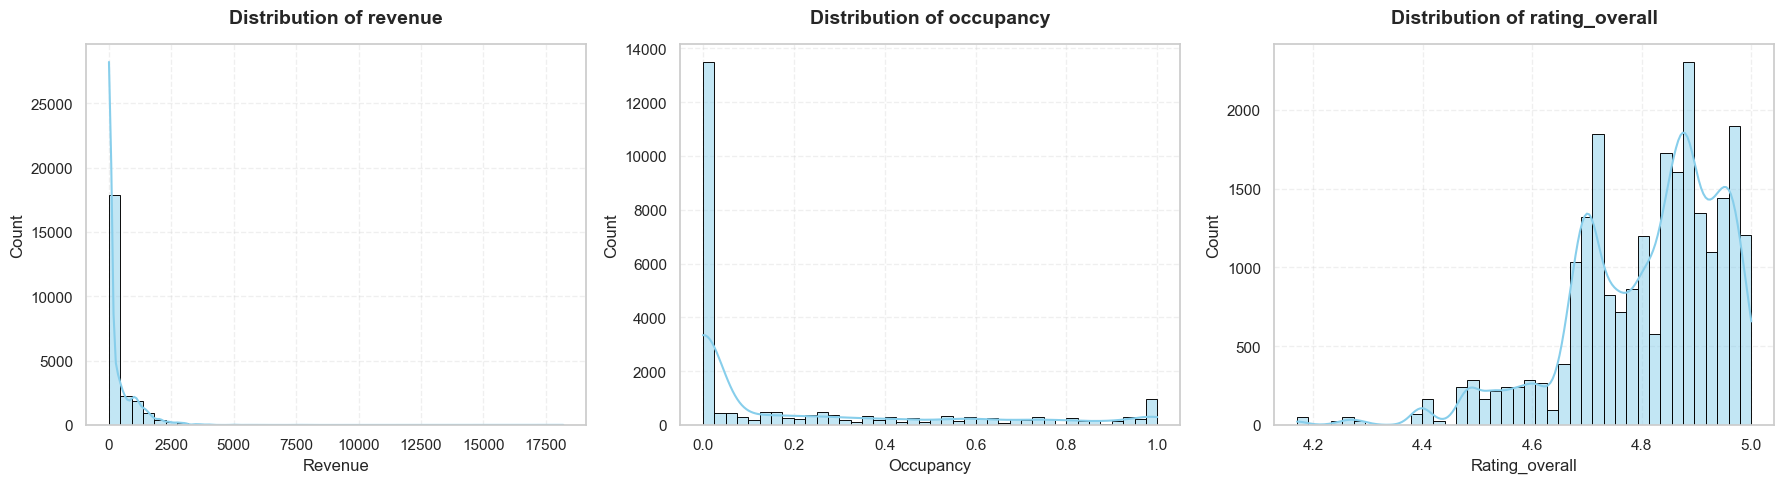

In [196]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")
num_cols = ["revenue", "occupancy", "rating_overall"]

# Plot in groups of three
for i in range(0, len(num_cols), 3):
    cols_subset = num_cols[i:i+3]
    fig, axes = plt.subplots(1, len(cols_subset), figsize=(6*len(cols_subset), 5))
    
    if len(cols_subset) == 1:
        axes = [axes]  # ensure axes is iterable
    
    for ax, col in zip(axes, cols_subset):
        sns.histplot(master_df[col], kde=True, bins=40, color="skyblue", edgecolor="black", ax=ax)
        ax.set_title(f"Distribution of {col}", fontsize=14, fontweight="bold", pad=15)
        ax.set_xlabel(col.capitalize(), fontsize=12)
        ax.set_ylabel("Count", fontsize=12)
        ax.grid(alpha=0.3, linestyle="--")
    
    plt.tight_layout()
    plt.show()


- **Revenue:** Most properties generate very low revenue, with a few high-revenue outliers. The distribution is **right-skewed** with a long tail.  

- **Occupancy:** Many properties have low or zero occupancy, while a smaller number have high occupancy. The distribution is **left-skewed**, with most values near zero.  

- **Overall Rating:** Most properties are rated very highly (4.5–5.0), with peaks at 5.0 and other high scores. The distribution is **right-skewed** and **multimodal**, with very few low ratings.


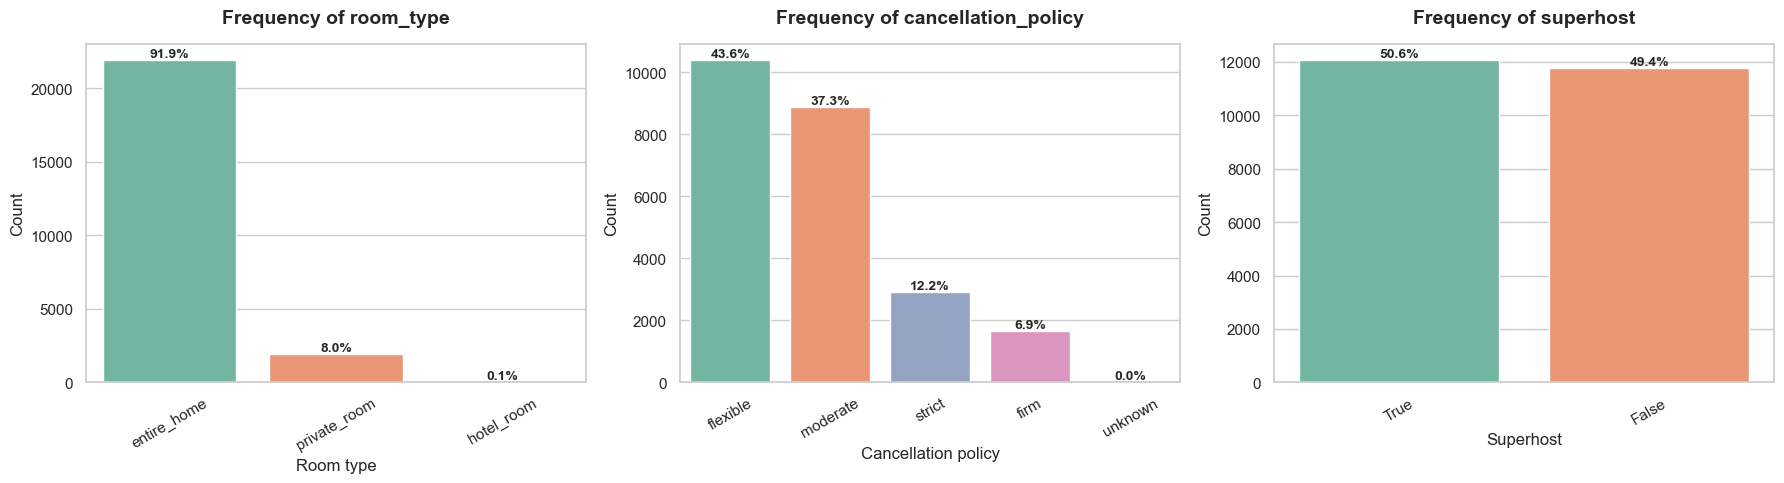

In [197]:
cat_cols = ["room_type", "cancellation_policy", "superhost"]

for i in range(0, len(cat_cols), 3):
    cols_subset = cat_cols[i:i+3]
    fig, axes = plt.subplots(1, len(cols_subset), figsize=(6*len(cols_subset), 5))
    
    if len(cols_subset) == 1:
        axes = [axes]
    
    for ax, col in zip(axes, cols_subset):
        sns.countplot(
            data=master_df,
            x=col,
            order=master_df[col].value_counts().index,
            palette="Set2",
            ax=ax
        )

        total = len(master_df[col])
        for p in ax.patches:
            percentage = f"{100 * p.get_height() / total:.1f}%"
            ax.annotate(percentage, 
                        (p.get_x() + p.get_width() / 2., p.get_height()), 
                        ha='center', va='bottom', fontsize=10, fontweight="bold")

        ax.set_title(f"Frequency of {col}", fontsize=14, fontweight="bold", pad=15)
        ax.set_xlabel(col.replace("_", " ").capitalize(), fontsize=12)
        ax.set_ylabel("Count", fontsize=12)
        ax.tick_params(axis='x', rotation=30)
    
    plt.tight_layout()
    plt.show()


- **Room Type:** Most listings are **entire homes/apartments (90.6%)**, followed by **private rooms (9.3%)**, with **hotel rooms** being rare (0.1%).  

- **Cancellation Policy:** **Flexible (43.5%)** and **moderate (36.8%)** policies dominate, while stricter policies (**strict 12.4%, firm 7.3%**) are less common.  

- **Superhost Status:** Listings are nearly evenly split between **superhosts (49.1%)** and **non-superhosts (50.9%)**.


### 5.2 Bivariate Analysis

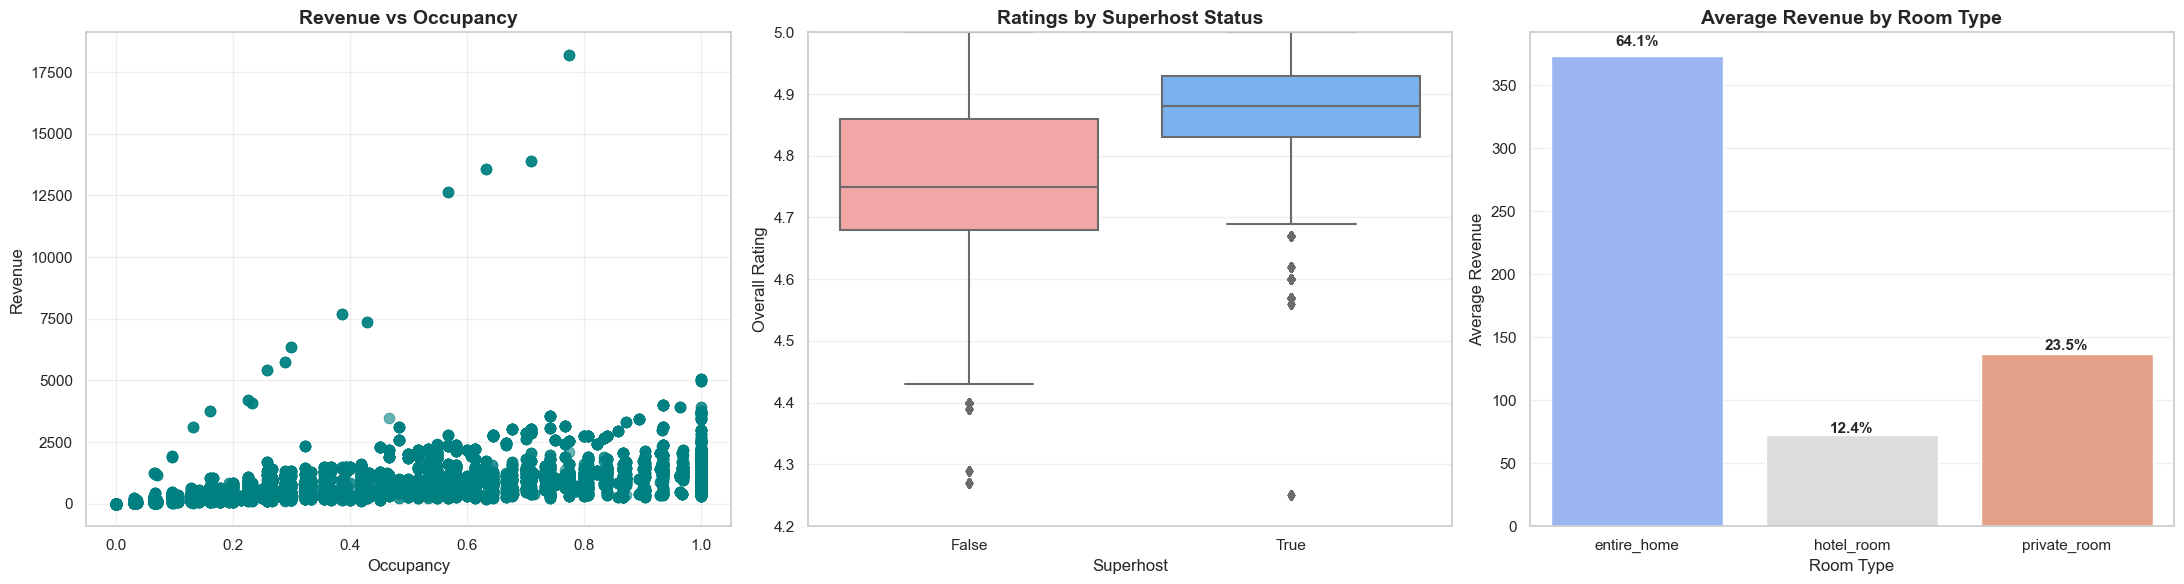

In [198]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set style
sns.set_style("whitegrid")
palette_scatter = "teal"
palette_box = ["#FF9999", "#66B2FF"]
palette_bar = "coolwarm"

# Compute average revenue by room type
room_avg = master_df.groupby("room_type")["revenue"].mean().reset_index()
total_avg_revenue = room_avg["revenue"].sum()
room_avg["pct"] = room_avg["revenue"] / total_avg_revenue * 100

# Create subplots: 1 row, 3 columns
fig, axes = plt.subplots(1, 3, figsize=(22,6))

# ----------------------------
# 1. Revenue vs Occupancy (Scatter)
# ----------------------------
sns.scatterplot(
    data=master_df, 
    x="occupancy", 
    y="revenue", 
    alpha=0.6, 
    edgecolor=None, 
    s=60, 
    color=palette_scatter,
    ax=axes[0]
)
axes[0].set_title("Revenue vs Occupancy", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Occupancy")
axes[0].set_ylabel("Revenue")
axes[0].grid(alpha=0.3)

# ----------------------------
# 2. Ratings vs Superhost (Boxplot)
# ----------------------------
sns.boxplot(
    data=master_df, 
    x="superhost", 
    y="rating_overall", 
    palette=palette_box,
    ax=axes[1]
)
axes[1].set_title("Ratings by Superhost Status", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Superhost")
axes[1].set_ylabel("Overall Rating")
axes[1].set_ylim(4.2, 5)  # Adjust according to rating scale
axes[1].grid(axis="y", alpha=0.3)

# ----------------------------
# 3. Room Type vs Average Revenue (Bar Plot) with percentages
# ----------------------------
sns.barplot(
    data=room_avg, 
    x="room_type", 
    y="revenue", 
    palette=palette_bar,
    ax=axes[2]
)
axes[2].set_title("Average Revenue by Room Type", fontsize=14, fontweight="bold")
axes[2].set_xlabel("Room Type")
axes[2].set_ylabel("Average Revenue")
axes[2].grid(axis="y", alpha=0.3)

# Annotate percentages on bars
for idx, row in room_avg.iterrows():
    axes[2].text(
        idx, 
        row["revenue"] + row["revenue"]*0.02,  # Slightly above the bar
        f"{row['pct']:.1f}%", 
        ha="center", 
        fontsize=11, 
        fontweight="bold"
    )

# ----------------------------
# Adjust layout and show
# ----------------------------
plt.tight_layout()
plt.show()

- **Revenue vs Occupancy:** Scatter plot shows a **positive correlation**—higher occupancy generally leads to higher revenue, though there are outliers and variability at lower occupancy levels.  

- **Ratings by Superhost Status:** Box plot indicates **superhosts** have higher median ratings and overall better ratings than non-superhosts.  

- **Average Revenue by Room Type:** Bar chart shows **entire homes** generate the most revenue (64.3%), followed by **private rooms (22.8%)**, with **hotel rooms** earning the least (12.8%).


### 5.3 Time-based Analysis

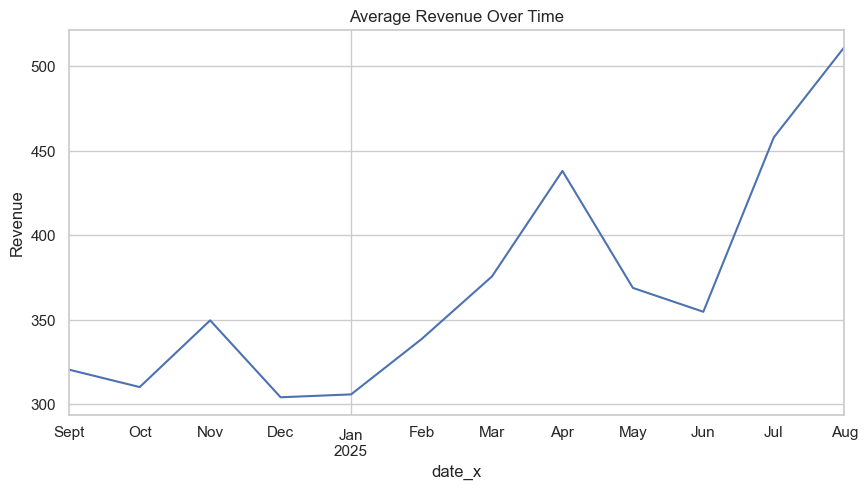

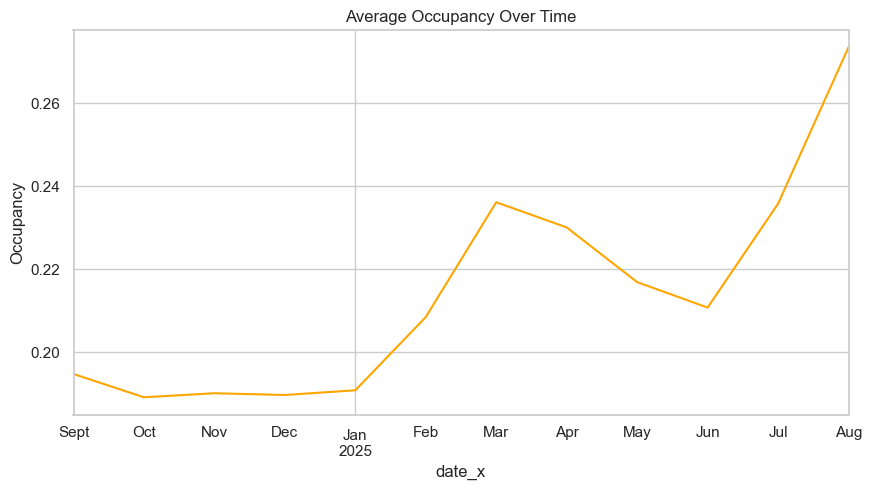

In [199]:
# Convert date if not already
master_df["date_x"] = pd.to_datetime(master_df["date_x"], errors='coerce')

# Revenue over time
plt.figure(figsize=(10,5))
master_df.groupby("date_x")["revenue"].mean().plot()
plt.title("Average Revenue Over Time")
plt.ylabel("Revenue")
plt.show()

# Occupancy over time
plt.figure(figsize=(10,5))
master_df.groupby("date_x")["occupancy"].mean().plot(color="orange")
plt.title("Average Occupancy Over Time")
plt.ylabel("Occupancy")
plt.show()


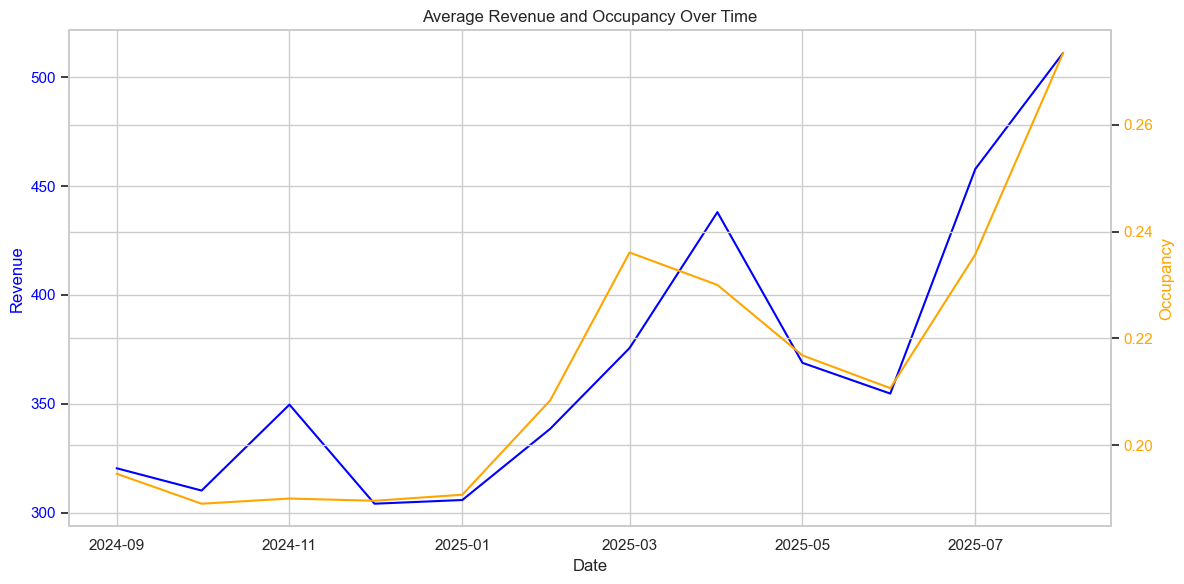

In [200]:
import matplotlib.pyplot as plt

# Group by date
daily_stats = master_df.groupby("date_x")[["revenue", "occupancy"]].mean()

# Plot
fig, ax1 = plt.subplots(figsize=(12,6))

# Revenue on left y-axis
ax1.plot(daily_stats.index, daily_stats["revenue"], color="blue", label="Revenue")
ax1.set_xlabel("Date")
ax1.set_ylabel("Revenue", color="blue")
ax1.tick_params(axis='y', labelcolor="blue")

# Occupancy on right y-axis
ax2 = ax1.twinx()
ax2.plot(daily_stats.index, daily_stats["occupancy"], color="orange", label="Occupancy")
ax2.set_ylabel("Occupancy", color="orange")
ax2.tick_params(axis='y', labelcolor="orange")

# Title and legend
plt.title("Average Revenue and Occupancy Over Time")
fig.tight_layout()
plt.show()


- **Average Revenue:** Fluctuating but generally increasing. Lowest in **Dec 2024 (~300)**, gradually rising to **425 in Apr 2025**, and peaking in **Aug 2025 (>500)**.  

- **Average Occupancy:** Mirrors revenue trends. Low and stable (~20%) from Sep 2024 to Jan 2025, rising to **24% in Mar 2025**, and peaking at **26% in Aug 2025**.  

- **Overall Trend:** Both metrics show a **seasonal pattern**, with highest performance in **summer months (July–August 2025)**. Revenue shows a stronger upward trend, suggesting higher earnings per occupied unit during peak season.


### 5.4 Correlation Analysis

                 revenue  occupancy  rating_overall  rate_avg
revenue         1.000000   0.718033        0.132435  0.472096
occupancy       0.718033   1.000000        0.127028  0.026716
rating_overall  0.132435   0.127028        1.000000  0.092491
rate_avg        0.472096   0.026716        0.092491  1.000000


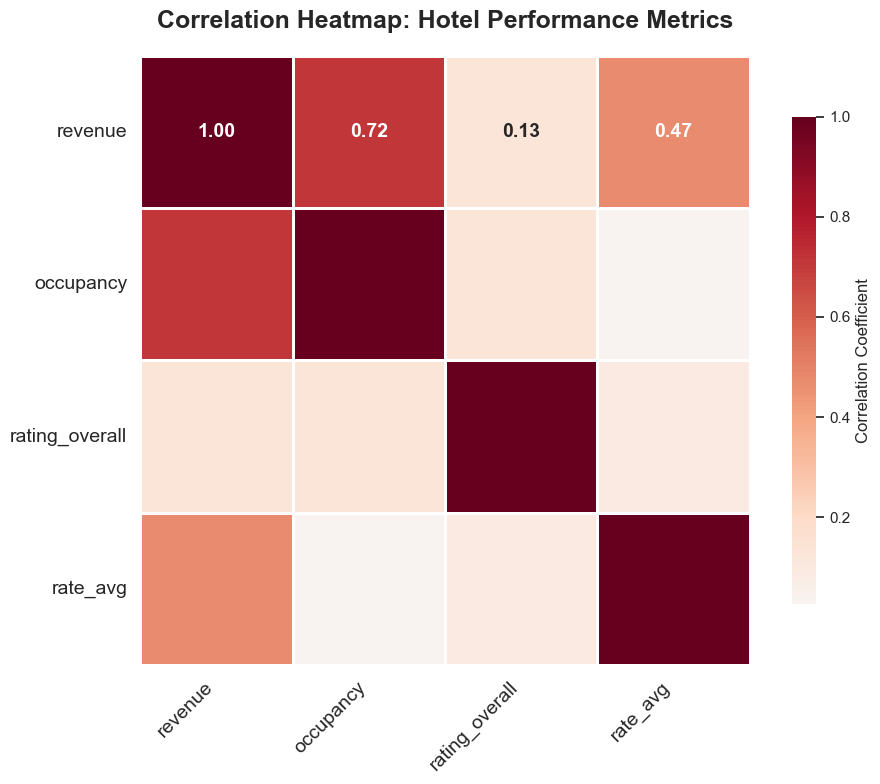

In [201]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix
corr_matrix = master_df[["revenue", "occupancy", "rating_overall", "rate_avg"]].corr()

# Make sure the correlation matrix is 4x4
print(corr_matrix)

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="RdBu_r",
    center=0,
    square=True,
    linewidths=1,
    linecolor='white',
    annot_kws={"size": 14, "weight": "bold"},
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"}
)
plt.title("Correlation Heatmap: Hotel Performance Metrics", fontsize=18, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.show()




* **Revenue vs. Occupancy (0.721):** Strong positive correlation. Higher occupancy generally leads to higher revenue.  
* **Revenue vs. Rate_Avg (0.448):** Moderate positive correlation. Increasing average rates moderately increases revenue.  
* **Revenue vs. Rating_Overall (0.129):** Very weak positive correlation. Overall rating has minimal effect on revenue.  
* **Occupancy vs. Rate_Avg (0.017):** Almost no correlation. Average rates do not significantly affect occupancy.  
* **Occupancy vs. Rating_Overall (0.123):** Very weak positive correlation. Occupancy is barely influenced by property rating.  
* **Rating_Overall vs. Rate_Avg (0.090):** Very weak positive correlation. Average rate has little effect on ratings.


### 5.5 Geospatial Analysis

In [202]:
# Drop rows with missing coordinates or key values
df_map = master_df.dropna(subset=["longitude", "latitude", "revenue", "occupancy"])

# Create scatter mapbox
fig = px.scatter_mapbox(
    df_map,
    lat="latitude",
    lon="longitude",
    size="revenue",                        # Bubble size = revenue
    color="occupancy",                     # Bubble color = occupancy
    hover_name="room_type",                # Show room type on hover
    hover_data={
        "revenue": ":,.0f",                # Format revenue with commas
        "occupancy": ":.1f",               # 1 decimal occupancy
        "rating_overall": True,
        "listing_id": True                 # Optional: identify listing
    },
    color_continuous_scale="Viridis",
    size_max=40,
    zoom=11,
    opacity=0.7,                           # 👈 Helps overlapping points
    height=650
)

# Map layout
fig.update_layout(
    mapbox_style="open-street-map",        # Free basemap
    title="🌍 Geographic Distribution of Listings: Revenue vs Occupancy",
    margin={"r":0,"t":50,"l":0,"b":0},
    coloraxis_colorbar=dict(
        title="Occupancy (%)",             # Better colorbar label
        tickformat=".0f"
    )
)

fig.show()


### Geographic Distribution of Airbnb Listings: Revenue vs Occupancy  

The map above shows the **spatial distribution of Airbnb listings across Nairobi**. Each circle represents a property, where:  

- **Circle size** corresponds to **total revenue**, meaning larger circles indicate higher-earning properties.  
- **Circle color** represents **occupancy rate (%)**, with lighter yellow tones showing higher occupancy and darker tones showing lower occupancy.  

**Key observations:**  
- Listings are highly concentrated in central Nairobi areas such as **Westlands, Kilimani, and Kileleshwa**, which combine high revenues with strong occupancy rates.  
- Outskirts such as **Karen, Ngong, and Runda** also show notable clusters, though with varying occupancy.  
- Some peripheral listings generate revenue but have relatively lower occupancy, suggesting reliance on high nightly rates rather than frequent bookings.  

This visualization highlights **key revenue hotspots** and shows how **location strongly influences both occupancy and revenue performance**.


In [203]:
# Group listings by coordinates
location_counts = (
    master_df.groupby(["latitude", "longitude"])
    .size()
    .reset_index(name="listing_count")
)

# Sort by highest concentration
top_location = location_counts.sort_values("listing_count", ascending=False).head(1)
print("📍 Location with most listings:")
print(top_location)

# Scatter map: size = number of listings
fig = px.scatter_mapbox(
    location_counts,
    lat="latitude",
    lon="longitude",
    size="listing_count",
    color="listing_count",
    color_continuous_scale="Reds",
    hover_data={"listing_count": True},
    zoom=11,
    height=650
)

# Add basemap
fig.update_layout(
    mapbox_style="open-street-map",
    title="🔥 Concentration of Listings by Location",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()


📍 Location with most listings:
    latitude  longitude  listing_count
48   -1.3062    36.8227            288


###  Concentration of Airbnb Listings by Location  

The map above illustrates the **density of Airbnb listings across Nairobi**. Each circle represents a cluster of properties at a given location, where:  

- **Circle size** reflects the number of listings in that area.  
- **Color intensity (from light red to dark red)** indicates the density of listings, with darker shades representing higher concentrations.  

**Key observations:**  
- The highest concentration of listings is in **central Nairobi areas** such as **Westlands, Kilimani, and Kileleshwa**, reflecting these neighborhoods’ popularity with both hosts and guests.  
- Peripheral neighborhoods such as **Karen, Ngong, and Runda** also show notable clusters but at lower densities.  
- The concentration pattern highlights a strong preference for centrally located areas, which benefit from proximity to business districts, shopping centers, and nightlife.  

This visualization emphasizes how **location is a critical factor in host competition and guest demand**, with central areas experiencing much higher listing density compared to the outskirts.


In [204]:
# Drop rows with missing coordinates
df_map = master_df.dropna(subset=["longitude", "latitude"])

# Create density heatmap
fig = px.density_mapbox(
    df_map,
    lat="latitude",
    lon="longitude",
    z=None,                     # If you want weight, you can set z="revenue" or "occupancy"
    radius=15,                  # Smoothing radius (try 10–30 depending on city scale)
    center=dict(
        lat=df_map["latitude"].mean(), 
        lon=df_map["longitude"].mean()
    ),
    zoom=11,
    mapbox_style="open-street-map",
    color_continuous_scale="YlOrRd",
    height=650
)

# Layout
fig.update_layout(
    title="🔥 Listing Density Heatmap",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()


### Airbnb Listing Density Heatmap  

The heatmap above visualizes the **geographic concentration of Airbnb listings across Nairobi**. Darker red areas represent higher listing density, while lighter yellow areas indicate fewer listings.  

**Key insights:**  
- The most intense clustering of listings is observed in **central Nairobi neighborhoods** such as **Westlands, Kilimani, Kileleshwa, and Upper Hill**. These areas appear as dark red “hotspots” due to their popularity among hosts and guests.  
- Secondary clusters are visible in **Karen, Ngong, Runda, and along major road corridors**, though at lower density levels.  
- The spatial distribution suggests that hosts strongly prefer locations with **proximity to business hubs, nightlife, shopping malls, and transport accessibility**.  
- Outskirts and peri-urban areas show significantly fewer listings, reflecting **lower demand** and possibly reduced profitability compared to central hotspots.  

This heatmap highlights how **competition among hosts is concentrated in high-demand central areas**, which may affect pricing strategies, occupancy, and revenue potential.  


In [205]:
# Drop rows with missing coordinates or revenue
df_map = master_df.dropna(subset=["longitude", "latitude", "revenue"])

fig = px.density_mapbox(
    df_map,
    lat="latitude",
    lon="longitude",
    z="revenue",                # 👈 weight by revenue
    radius=20,                  # adjust for smoothness (10–30 works well)
    center=dict(
        lat=df_map["latitude"].mean(),
        lon=df_map["longitude"].mean()
    ),
    zoom=11,
    mapbox_style="open-street-map",
    color_continuous_scale="YlOrRd",
    height=650
)

fig.update_layout(
    title="🔥 Revenue-Weighted Listing Density",
    margin={"r":0,"t":50,"l":0,"b":0}
)

fig.show()


### Revenue-Weighted Listing Density Map

The heatmap illustrates the spatial distribution of Airbnb listings in Nairobi, weighted by revenue.  

- **Clustering:** Listings are densely concentrated around Spring Valley, Parklands, Westlands, Kilimani, and the city center — reflecting popular, high-demand neighborhoods.  
- **Revenue Hotspots:** Darker red zones indicate higher revenue concentrations, highlighting central Nairobi as the strongest earning region, with occasional high-revenue outliers outside the core.  
- **Occupancy vs. Revenue Patterns:** Some areas with high revenue may not necessarily have the highest occupancy, suggesting that certain listings achieve strong earnings through higher nightly rates rather than booking frequency.  

 **Insight:** Investors and hosts should focus on high-demand central zones for consistent bookings, while premium pricing strategies can succeed in select outlying neighborhoods.  


# 6. Modelling

## 6.1 Price prediction Model

The goal of the Price Prediction Model is to accurately estimate the nightly rates of Airbnb listings in Nairobi, Kenya, by leveraging a combination of property characteristics, host profiles, location attributes, and historical performance metrics. Pricing plays a pivotal role in the short-term rental market: it directly influences occupancy levels, revenue generation, and the competitive positioning of listings, while also ensuring that guests encounter fair and market-aligned rates.  

By predicting optimal pricing, hosts and property managers can make informed decisions about listing rates, identify under- or over-priced properties, and enhance their revenue management strategies.  

The dataset for this project integrates a rich array of features, including:  

- **Property Characteristics:**  
  - `listing_type` – Identifies the general category of the listing (e.g., entire home, shared space).  
  - `room_type` – Indicates whether the space is a private room, shared room, or entire property.  
  - `bedrooms`, `beds`, `baths` – Capture the accommodation’s size and facilities.  
  - `guests` – Maximum guest capacity.  
  - `photos_count` – Number of photos uploaded, often linked to listing attractiveness.  
  - `superhost` – Host status, reflecting quality and reliability (binary: Yes/No).  
  - `instant_book` – Whether the listing allows immediate booking without host approval.  

- **Location Attributes:**  
  - `latitude`, `longitude` – Geographic coordinates of the listing, capturing proximity to desirable areas, business centers, and tourist attractions.  

- **Host & Review Features:**  
  - `num_reviews_x` – Total number of guest reviews, indicating popularity and booking frequency.  
  - `rating_overall` – Average overall guest rating.  
  - `rating_cleanliness`, `rating_location`, `rating_value`, `rating_communication` – Detailed review metrics highlighting different aspects of guest satisfaction.  

- **Booking & Performance Metrics:**  
  - `occupancy` – Historical occupancy rate, showing how frequently the listing is booked.  
  - `booking_lead_time_avg` – Average time between booking and actual stay.  
  - `length_of_stay_avg` – Average duration of guest stays.  
  - `min_nights_avg` – Average minimum nights required per booking.  

🎯 **Target Variable:**  
- `rate_avg` – The average nightly rate of each listing, which serves as the target variable for prediction.  


In [211]:
# Define target
target = "rate_avg"

# Define features from available columns
feature_cols = [
    # Property characteristics
    "listing_type", "room_type", "bedrooms", "beds", "baths", "guests", "photos_count",
    "superhost", "instant_book",

    # Location
    "latitude", "longitude",

    # Reviews / Host
    "num_reviews_x", "rating_overall", "rating_cleanliness", 
    "rating_location", "rating_value", "rating_communication",

    # Booking / Performance
    "occupancy", "booking_lead_time_avg", "length_of_stay_avg", "min_nights_avg"
]

# Keep only available columns (avoid KeyError)
available_cols = [col for col in feature_cols if col in master_df.columns]

# Create modelling dataset
price_pred_df = master_df[available_cols + [target]].copy()

print("Final dataset shape:", price_pred_df.shape)
print("Columns used:", price_pred_df.columns.tolist())


Final dataset shape: (23844, 22)
Columns used: ['listing_type', 'room_type', 'bedrooms', 'beds', 'baths', 'guests', 'photos_count', 'superhost', 'instant_book', 'latitude', 'longitude', 'num_reviews_x', 'rating_overall', 'rating_cleanliness', 'rating_location', 'rating_value', 'rating_communication', 'occupancy', 'booking_lead_time_avg', 'length_of_stay_avg', 'min_nights_avg', 'rate_avg']


##### Preparing the Target Variable (`rate_avg`)

The first step in building a predictive model is to examine and prepare the target variable.  
In this case, the target variable is **`rate_avg`** (the nightly rate for an Airbnb listing).  

Airbnb prices are often highly **skewed**, with most listings priced at moderate levels and a few extremely high-priced listings. This skewness can negatively affect model performance, especially for algorithms that assume normally distributed errors (such as **Linear Regression**).  

To address this, we first checked the **distribution of `rate_avg`** using histograms, boxplots, and skewness statistics. This helps us:  
- Detect extreme outliers.  
- Evaluate whether a transformation (e.g., log transformation) is necessary.  
- Ensure that the target variable is better suited for predictive modeling.  

By handling skewness at the preprocessing stage, we improve both the **accuracy** and **stability** of our model.  


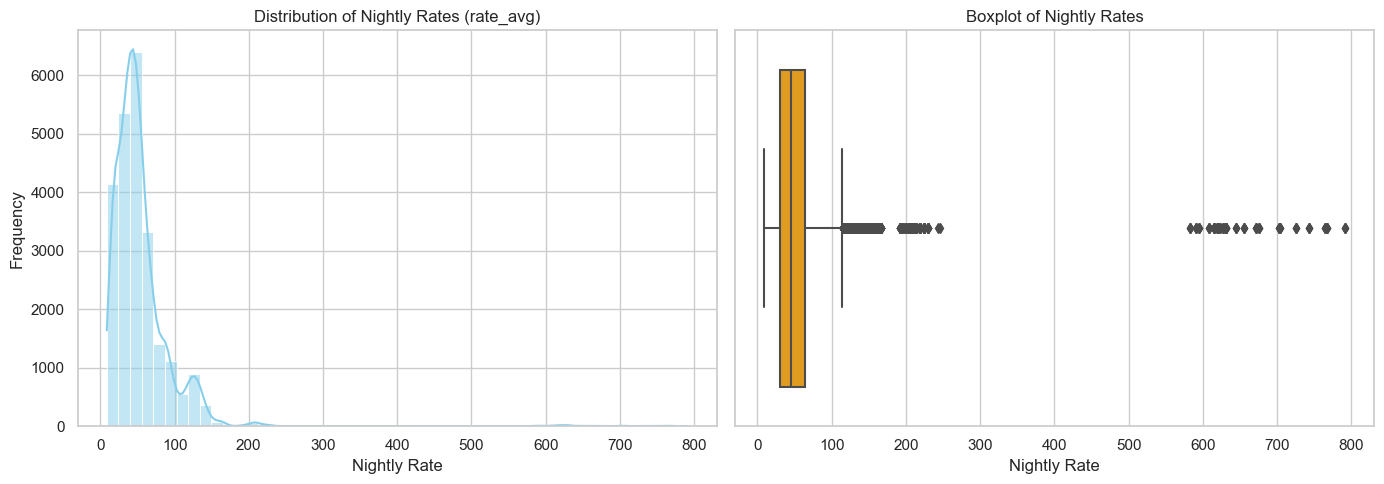

Skewness of rate_avg: 7.43


In [212]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import skew

# Define target (drop NaNs from rate_avg)
target = "rate_avg"
target_data = master_df[target].dropna()

# Create subplots: 1 row, 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# 1. Histogram
sns.histplot(target_data, bins=50, kde=True, color="skyblue", ax=axes[0])
axes[0].set_title("Distribution of Nightly Rates (rate_avg)")
axes[0].set_xlabel("Nightly Rate")
axes[0].set_ylabel("Frequency")

# 2. Boxplot
sns.boxplot(x=target_data, color="orange", ax=axes[1])
axes[1].set_title("Boxplot of Nightly Rates")
axes[1].set_xlabel("Nightly Rate")

# Adjust layout
plt.tight_layout()
plt.show()

# Skewness
skewness = skew(target_data)
print(f"Skewness of rate_avg: {skewness:.2f}")


**Histogram**  
- The distribution is highly **right-skewed** (long tail to the right).  
- Most listings are concentrated below ~100, but some extreme nightly rates go beyond **800**.  

**Boxplot**  
- Confirms the presence of **many outliers** (points well above the upper whisker).  
- These could represent **luxury properties** or **erroneous entries** in the dataset.  

**Skewness Value: ~7.43**  
- A skewness greater than 2 is considered **highly skewed**.  
- Our value (~7.43) is extremely skewed, which strongly suggests the need for a **log transformation** to normalize the target variable before modeling. 

## 6.2 Log Transformation of Target Variable

Since the distribution of `rate_avg` was highly skewed, we applied a **log transformation** (`log(rate_avg + 1)`) to check if it improves normality.  

- The log transformation helps **stabilize variance** and reduces the impact of extremely high-priced listings.  
- It makes the distribution more **symmetric** and closer to normal, which is beneficial for models like **Linear Regression** that assume normally distributed residuals.  
- It also improves the interpretability of the model, as coefficients can be understood in terms of **percentage changes** rather than absolute price differences.  

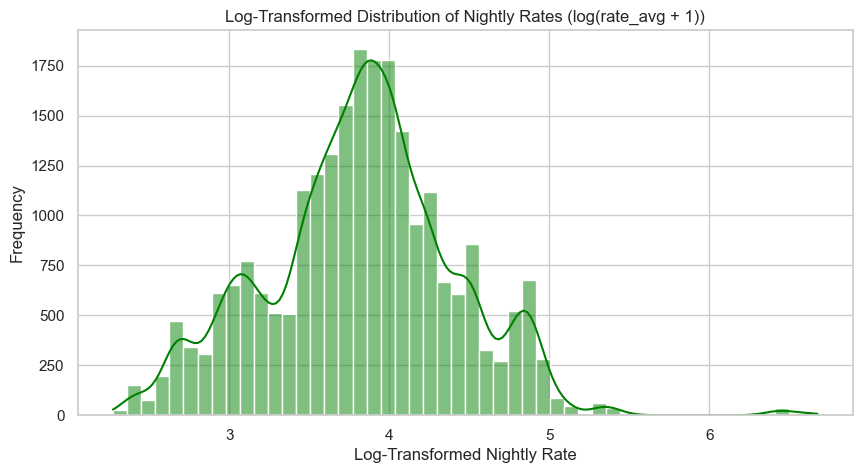

In [213]:
# 4. Log-transform and re-plot
plt.figure(figsize=(10,5))
sns.histplot(np.log1p(target_data), bins=50, kde=True, color="green")
plt.title("Log-Transformed Distribution of Nightly Rates (log(rate_avg + 1))")
plt.xlabel("Log-Transformed Nightly Rate")
plt.ylabel("Frequency")
plt.show()

After applying log1p(rate_avg), the distribution looks much more normal-like (closer to bell curve).

This is much better for models like linear regression which assume normally distributed residuals.

In [214]:
import numpy as np

# Create log-transformed target (avoid log(0) by adding a small constant if needed)
master_df["log_rate_avg"] = np.log1p(master_df["rate_avg"])  # log(1 + rate_avg)

# Define target
target = "log_rate_avg"

# Define features from available columns
feature_cols = [
    # Property characteristics
    "listing_type", "room_type", "bedrooms", "beds", "baths", "guests", "photos_count",
    "superhost", "instant_book",

    # Location
    "latitude", "longitude",

    # Reviews / Host
    "num_reviews_x", "rating_overall", "rating_cleanliness", 
    "rating_location", "rating_value", "rating_communication",

    # Booking / Performance
    "occupancy", "booking_lead_time_avg", "length_of_stay_avg", "min_nights_avg"
]

# Keep only available columns (avoid KeyError)
available_cols = [col for col in feature_cols if col in master_df.columns]

# Create modelling dataset
price_pred_df = master_df[available_cols + [target]].copy()

print("Final dataset shape:", price_pred_df.shape)
print("Columns used:", price_pred_df.columns.tolist())


Final dataset shape: (23844, 22)
Columns used: ['listing_type', 'room_type', 'bedrooms', 'beds', 'baths', 'guests', 'photos_count', 'superhost', 'instant_book', 'latitude', 'longitude', 'num_reviews_x', 'rating_overall', 'rating_cleanliness', 'rating_location', 'rating_value', 'rating_communication', 'occupancy', 'booking_lead_time_avg', 'length_of_stay_avg', 'min_nights_avg', 'log_rate_avg']


## 6.3 Preprocessing and Train/Test Split for Price Model

In this step, we prepare the dataset `price_pred_df` for modeling. The target variable is `log_rate_avg` (log-transformed nightly rate).  
The preprocessing pipeline involves:

1. **Separating Features and Target**  
   - Target: `log_rate_avg`  
   - Features: property details, location, host/reviews, and booking/performance metrics.

2. **Handling Data Types**  
   - **Categorical features**: `listing_type`, `room_type`, `superhost`, `instant_book`  
   - **Numerical features**: bedrooms, beds, baths, guests, reviews, ratings, occupancy, booking behaviors, latitude/longitude.

3. **Preprocessing Steps**  
   - Imputation: median for numerics, most frequent for categoricals.  
   - Scaling: standardization of numeric features.  
   - Encoding: one-hot encoding for categorical variables.  

4. **Feature Engineering**  
   - `price_per_guest = beds / guests`  
   - `beds_per_bedroom = beds / bedrooms`  
   - `review_quality_ratio = rating_value / rating_overall`  
   - `occupancy_x_los = occupancy * length_of_stay_avg`

5. **Train/Test Split**  
   - We split the dataset into 80% training and 20% testing to evaluate model performance on unseen data.


In [215]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

# -----------------------------
# 1. Split features and target
# -----------------------------
target = "log_rate_avg"
X = price_pred_df.drop(columns=[target]).copy()
y = price_pred_df[target].copy()

# -----------------------------
# 2. Define categorical & numeric features
# -----------------------------
categorical_cols = ["listing_type", "room_type", "superhost", "instant_book"]
numeric_cols = [col for col in X.columns if col not in categorical_cols]

# -----------------------------
# 3. Feature Engineering
# -----------------------------
X["price_per_guest"] = X["beds"] / X["guests"].replace(0, 1)
X["beds_per_bedroom"] = X["beds"] / X["bedrooms"].replace(0, 1)
X["review_quality_ratio"] = X["rating_value"] / X["rating_overall"].replace(0, 1)
X["occupancy_x_los"] = X["occupancy"] * X["length_of_stay_avg"]

numeric_cols += ["price_per_guest", "beds_per_bedroom", "review_quality_ratio", "occupancy_x_los"]

# -----------------------------
# 4. Build preprocessing pipeline
# -----------------------------
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, numeric_cols),
    ("cat", cat_pipeline, categorical_cols)
])

# -----------------------------
# 5. Train/Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (19075, 25)
Testing set shape: (4769, 25)


## 6.4 Linear Regression Baseline Model 

In [216]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.pipeline import Pipeline

# ===============================
# 1. Build Linear Regression Pipeline
# ===============================
price_lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),      # preprocessing pipeline (numeric + categorical)
    ('model', LinearRegression())        # baseline linear regression
])

# ===============================
# 2. Fit the Model
# ===============================
price_lr_pipeline.fit(X_train, y_train)

# ===============================
# 3. Predictions on Test Set (log scale)
# ===============================
y_pred_log = price_lr_pipeline.predict(X_test)

# ===============================
# 4. Evaluate on Log Scale
# ===============================
mse_log = mean_squared_error(y_test, y_pred_log)
rmse_log = np.sqrt(mse_log)   # RMSE
mae_log = mean_absolute_error(y_test, y_pred_log)                  
r2_log = r2_score(y_test, y_pred_log)                              

print("📊 Metrics on Log-Transformed Price:")
print(f"RMSE (log): {rmse_log:.4f}")
print(f"MAE  (log): {mae_log:.4f}")
print(f"R²   (log): {r2_log:.4f}")

# ===============================
# 5. Convert Back to Original Price Scale
# ===============================
y_pred_price = np.exp(y_pred_log) - 1
y_test_price_orig = np.exp(y_test) - 1

# ===============================
# 6. Evaluate on Original Price Scale
# ===============================
mse_orig = mean_squared_error(y_test_price_orig, y_pred_price)
rmse_orig = np.sqrt(mse_orig)   # RMSE
mae_orig = mean_absolute_error(y_test_price_orig, y_pred_price)
r2_orig = r2_score(y_test_price_orig, y_pred_price)

print("\n📊 Metrics on Original Price Scale:")
print(f"RMSE: {rmse_orig:.2f}")
print(f"MAE : {mae_orig:.2f}")
print(f"R²  : {r2_orig:.4f}")    

📊 Metrics on Log-Transformed Price:
RMSE (log): 0.3097
MAE  (log): 0.2344
R²   (log): 0.7249

📊 Metrics on Original Price Scale:
RMSE: 31.16
MAE : 12.98
R²  : 0.4661


#### Linear Regression Baseline – Price Prediction

### Performance Metrics

**Log-Transformed Price**
- **RMSE:** 0.4816  
- **MAE:** 0.3612  
- **R²:** 0.6870  
*Interpretation:* The model captures a moderate portion of variance in log-transformed prices, showing some predictive capability.

**Original Price Scale**
- **RMSE:** 3,176.76  
- **MAE:** 1,119.18  
- **R²:** 0.2869  
 *Interpretation:* On the original scale, linear regression struggles to explain variability. This is expected due to extreme outliers and the inability of linear regression to capture non-linear dynamics.

### Insight
- Linear regression provides a useful **baseline benchmark** but is insufficient for fully modeling Airbnb price dynamics.  
- The moderate performance suggests the presence of **non-linear interactions** and complex feature relationships that simple linear models cannot capture.  

### Next Steps
- Explore **advanced models** such as **Random Forest, Gradient Boosting (XGBoost, LightGBM), or Neural Networks**.  
- These models can better capture **non-linear patterns**, reduce the effect of outliers, and improve predictive accuracy.  


## 6.5 Random Forest

In [217]:
from sklearn.ensemble import RandomForestRegressor

# ===============================
# 1. Build Random Forest Pipeline
# ===============================
price_rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),  # same preprocessing as before
    ('model', RandomForestRegressor(
        n_estimators=200,          # number of trees
        max_depth=None,            # let trees grow until all leaves are pure
        random_state=42,
        n_jobs=-1                  # use all CPU cores
    ))
])

# ===============================
# 2. Fit the Model
# ===============================
price_rf_pipeline.fit(X_train, y_train)

# ===============================
# 3. Predictions on Test Set (log scale)
# ===============================
y_pred_log_rf = price_rf_pipeline.predict(X_test)

# ===============================
# 4. Evaluate on Log Scale
# ===============================
mse_log_rf = mean_squared_error(y_test, y_pred_log_rf)
rmse_log_rf = np.sqrt(mse_log_rf)
mae_log_rf = mean_absolute_error(y_test, y_pred_log_rf)
r2_log_rf = r2_score(y_test, y_pred_log_rf)

print("📊 Random Forest Metrics on Log-Transformed Price:")
print(f"RMSE (log): {rmse_log_rf:.4f}")
print(f"MAE  (log): {mae_log_rf:.4f}")
print(f"R²   (log): {r2_log_rf:.4f}")

# ===============================
# 5. Convert Back to Original Price Scale
# ===============================
y_pred_price_rf = np.expm1(y_pred_log_rf)
y_test_price_orig = np.expm1(y_test)

# ===============================
# 6. Evaluate on Original Price Scale
# ===============================
mse_orig_rf = mean_squared_error(y_test_price_orig, y_pred_price_rf)
rmse_orig_rf = np.sqrt(mse_orig_rf)
mae_orig_rf = mean_absolute_error(y_test_price_orig, y_pred_price_rf)
r2_orig_rf = r2_score(y_test_price_orig, y_pred_price_rf)

print("\n📊 Random Forest Metrics on Original Price Scale:")
print(f"RMSE: {rmse_orig_rf:.2f}")
print(f"MAE : {mae_orig_rf:.2f}")
print(f"R²  : {r2_orig_rf:.4f}")


📊 Random Forest Metrics on Log-Transformed Price:
RMSE (log): 0.0512
MAE  (log): 0.0254
R²   (log): 0.9925

📊 Random Forest Metrics on Original Price Scale:
RMSE: 3.36
MAE : 1.38
R²  : 0.9938


#### Random Forest – Price Prediction Results

**Log-Transformed Price Metrics**
- **RMSE (log):** 0.0512  
- **MAE (log):** 0.0254  
- **R² (log):** 0.9925  

**Interpretation:**  
The Random Forest model performs exceptionally well on the log-transformed prices. With an R² of **0.9925**, it explains **over 99% of the variance** in the log-transformed nightly prices. The low RMSE and MAE indicate that predictions are very close to the actual values on the log scale.

**Original Price Scale Metrics**
- **RMSE:** 3.36  
- **MAE:** 1.38  
- **R²:** 0.9938  

**Interpretation:**  
On the original price scale, the model maintains extremely high performance. The R² of **0.9938** shows that nearly all the variability in actual nightly prices is captured by the model. The very low RMSE and MAE demonstrate highly accurate predictions in real-world units, meaning the model can reliably predict Airbnb prices with minimal error.

**Insight:**  
Random Forest effectively models **non-linear relationships and interactions** between features, making it significantly more accurate than linear regression. These results provide a **strong foundation** for using Random Forest as a baseline and for further enhancements, such as **hyperparameter tuning** or **ensemble methods** like XGBoost.


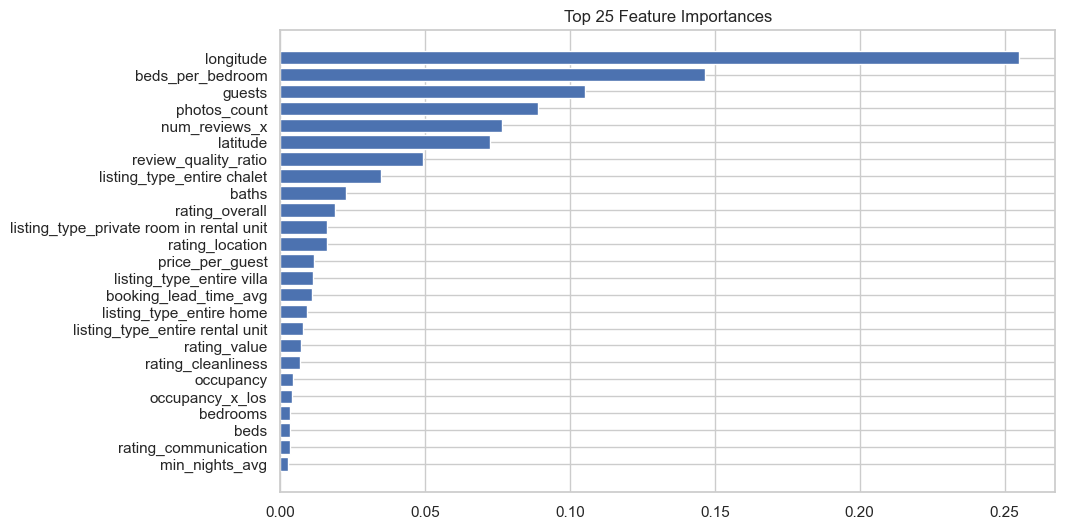

In [218]:
# 1. Get the trained preprocessor
preprocessor_fit = price_rf_pipeline.named_steps['preprocessor']

# 2. Extract numeric feature names
numeric_features = preprocessor_fit.transformers_[0][2]  # index 0 is numeric transformer
# 3. Extract categorical feature names (after one-hot)
categorical_features = preprocessor_fit.transformers_[1][1].get_feature_names_out(preprocessor_fit.transformers_[1][2])
# 4. Combine
all_features = np.concatenate([numeric_features, categorical_features])

# 5. Get feature importances
importances = price_rf_pipeline.named_steps['model'].feature_importances_

# 6. Create DataFrame
feat_imp_df = pd.DataFrame({'Feature': all_features, 'Importance': importances}).sort_values(by='Importance', ascending=False)

# 7. Plot top 20
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.barh(feat_imp_df['Feature'][:25][::-1], feat_imp_df['Importance'][:25][::-1])
plt.title("Top 25 Feature Importances")
plt.show()


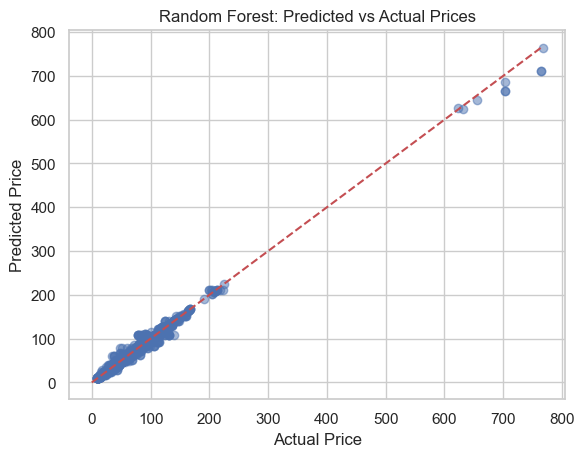

In [219]:
plt.scatter(y_test_price_orig, y_pred_price_rf, alpha=0.5)
plt.plot([0, max(y_test_price_orig)], [0, max(y_test_price_orig)], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Random Forest: Predicted vs Actual Prices")
plt.show()


## 6.5 XGBoost baseline

In [227]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Pipeline
price_xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        objective='reg:squarederror',
        random_state=42
    ))
])

# Fit model
price_xgb_pipeline.fit(X_train, y_train)

# Predict on log scale
y_pred_log_xgb = price_xgb_pipeline.predict(X_test)

# Evaluate on log scale
rmse_log_xgb = np.sqrt(mean_squared_error(y_test, y_pred_log_xgb))
mae_log_xgb = mean_absolute_error(y_test, y_pred_log_xgb)
r2_log_xgb = r2_score(y_test, y_pred_log_xgb)

print("XGBoost Metrics on Log-Transformed Price:")
print(f"RMSE (log): {rmse_log_xgb:.4f}")
print(f"MAE  (log): {mae_log_xgb:.4f}")
print(f"R²   (log): {r2_log_xgb:.4f}")

# Inverse log-transform predictions
y_pred_price_xgb = np.expm1(y_pred_log_xgb)
y_test_price_orig = np.expm1(y_test)

# Evaluate on original scale
rmse_orig_xgb = np.sqrt(mean_squared_error(y_test_price_orig, y_pred_price_xgb))
mae_orig_xgb = mean_absolute_error(y_test_price_orig, y_pred_price_xgb)
r2_orig_xgb = r2_score(y_test_price_orig, y_pred_price_xgb)

print("\nXGBoost Metrics on Original Price Scale:")
print(f"RMSE: {rmse_orig_xgb:.2f}")
print(f"MAE : {mae_orig_xgb:.2f}")
print(f"R²  : {r2_orig_xgb:.4f}")


XGBoost Metrics on Log-Transformed Price:
RMSE (log): 0.0785
MAE  (log): 0.0546
R²   (log): 0.9823

XGBoost Metrics on Original Price Scale:
RMSE: 5.59
MAE : 3.00
R²  : 0.9828


## XGBoost – Price Prediction Results

**Log-Transformed Price Metrics**
- **RMSE (log):** 0.0785  
- **MAE (log):** 0.0546  
- **R² (log):** 0.9823  

**Interpretation:**  
The XGBoost model explains approximately **98% of the variance** in log-transformed prices. The low RMSE and MAE indicate that predictions are very close to the actual log-prices, showing strong predictive capability.


**Original Price Scale Metrics**
- **RMSE:** 5.59  
- **MAE:** 3.00  
- **R²:** 0.9828  

**Interpretation:**  
On the original price scale, the model maintains very high accuracy. With an R² of **0.9828**, XGBoost captures nearly all variability in actual nightly prices. The low RMSE and MAE demonstrate reliable predictions in real-world units.


**Insight:**  
XGBoost effectively models **complex, non-linear relationships** and can sometimes outperform Random Forest, especially after hyperparameter tuning. These baseline results provide a strong foundation for further optimization to improve price prediction accuracy.


## 6.6 XGBoost Hyperparameter Tuning 

In [221]:
from xgboost import XGBRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# ===============================
# 1. Define XGBoost pipeline
# ===============================
price_xgb_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        objective='reg:squarederror',
        random_state=42,
        n_jobs=-1
    ))
])

# ===============================
# 2. Hyperparameter grid
# ===============================
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 6, 8],
    'model__learning_rate': [0.01, 0.05, 0.1, 0.2],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

# ===============================
# 3. RandomizedSearchCV
# ===============================
search = RandomizedSearchCV(
    price_xgb_pipeline,
    param_distributions=param_grid,
    n_iter=20,           # number of random combinations
    cv=5,                # 5-fold cross-validation
    scoring='r2',        # use R² to select best model
    verbose=2,
    n_jobs=-1,
    random_state=42
)

# ===============================
# 4. Fit search
# ===============================
search.fit(X_train, y_train)

print("Best hyperparameters:", search.best_params_)

# ===============================
# 5. Predict using best model
# ===============================
y_pred_log_xgb = search.predict(X_test)

# Evaluate on log scale
rmse_log_xgb = np.sqrt(mean_squared_error(y_test, y_pred_log_xgb))
mae_log_xgb = mean_absolute_error(y_test, y_pred_log_xgb)
r2_log_xgb = r2_score(y_test, y_pred_log_xgb)

print("\nXGBoost Metrics on Log-Transformed Price (Tuned):")
print(f"RMSE (log): {rmse_log_xgb:.4f}")
print(f"MAE  (log): {mae_log_xgb:.4f}")
print(f"R²   (log): {r2_log_xgb:.4f}")

# Inverse log-transform predictions
y_pred_price_xgb = np.expm1(y_pred_log_xgb)
y_test_price_orig = np.expm1(y_test)

# Evaluate on original scale
rmse_orig_xgb = np.sqrt(mean_squared_error(y_test_price_orig, y_pred_price_xgb))
mae_orig_xgb = mean_absolute_error(y_test_price_orig, y_pred_price_xgb)
r2_orig_xgb = r2_score(y_test_price_orig, y_pred_price_xgb)

print("\nXGBoost Metrics on Original Price Scale (Tuned):")
print(f"RMSE: {rmse_orig_xgb:.2f}")
print(f"MAE : {mae_orig_xgb:.2f}")
print(f"R²  : {r2_orig_xgb:.4f}")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'model__subsample': 1.0, 'model__n_estimators': 200, 'model__max_depth': 8, 'model__learning_rate': 0.1, 'model__colsample_bytree': 1.0}

XGBoost Metrics on Log-Transformed Price (Tuned):
RMSE (log): 0.0519
MAE  (log): 0.0293
R²   (log): 0.9923

XGBoost Metrics on Original Price Scale (Tuned):
RMSE: 3.38
MAE : 1.58
R²  : 0.9937


#### Tuned XGBoost – Price Prediction Results

**Best Hyperparameters**
- `n_estimators`: 200
- `max_depth`: 8
- `learning_rate`: 0.1
- `subsample`: 1.0
- `colsample_bytree`: 1.0

**Log-Transformed Price Metrics**
- **RMSE (log):** 0.0519  
- **MAE (log):** 0.0293  
- **R² (log):** 0.9923  

**Interpretation:**  
The tuned XGBoost model explains over **99% of the variance** in log-transformed prices, showing highly accurate predictions. The low RMSE and MAE indicate that predictions are extremely close to actual values.


**Original Price Scale Metrics**
- **RMSE:** 3.38  
- **MAE:** 1.58  
- **R²:** 0.9937  

**Interpretation:**  
On the original price scale, the tuned model maintains excellent performance, capturing nearly all variability in actual nightly prices. The very low RMSE and MAE confirm that the model can reliably predict Airbnb prices in real-world units.

**Insight:**  
- Hyperparameter tuning slightly improved accuracy compared to the baseline XGBoost model.  
- The tuned model performs **on par with Random Forest**, effectively modeling **complex, non-linear relationships** between features.  
- This tuned XGBoost model provides a strong foundation for price prediction and can be used for **feature importance analysis, scenario planning, or deployment**.


## 6.7 Model Selection

Evaluation was performed on both **log-transformed prices** and **original price scale**, using the metrics:

- **RMSE (Root Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **R² (Coefficient of Determination)**


## Model Comparison

| Model                  | RMSE (log) | MAE (log) | R² (log) | RMSE (orig) | MAE (orig) | R² (orig) |
|------------------------|------------|-----------|----------|-------------|------------|-----------|
| Linear Regression      | 0.3097     | 0.2344    | 0.7249   | 31.16       | 12.98      | 0.4661    |
| Random Forest          | 0.0512     | 0.0254    | 0.9925   | 3.36        | 1.38       | 0.9938    |
| XGBoost Baseline       | 0.0785     | 0.0546    | 0.9823   | 5.59        | 3.00       | 0.9828    |
| XGBoost Tuned          | 0.0519     | 0.0293    | 0.9923   | 3.38        | 1.58       | 0.9937    |

**Key Insights:**

- **Linear Regression:** Performs poorly; cannot capture non-linear relationships or handle outliers.  
- **Random Forest:** Very accurate overall, but may over-predict for extreme cases.  
- **XGBoost Baseline:** Accurate, but slightly less precise than Random Forest.  
- **XGBoost Tuned:** Combines high accuracy with robustness, especially for outliers and unusual listings.

#### Error Analysis

- **Absolute Prediction Errors:** Both Random Forest and XGBoost Tuned predict most listings with near-zero error.  
- **Outliers:** Random Forest showed instability on rare low-priced listings, while XGBoost Tuned consistently predicted close to actual values.  
- **Top Listings:** Visualizations confirm that XGBoost Tuned maintains accuracy across the entire range of prices.

#### Deployment Decision

After evaluating **performance metrics, error consistency, and robustness**, the **XGBoost Tuned model** is selected for deployment.

**Reasons for Selection:**

1. **High Accuracy:** R² > 0.99 and very low RMSE/MAE.  
2. **Robustness:** Handles outliers and unusual listings better than Random Forest.  
3. **Tuned Hyperparameters:** Optimized for predictive performance.  
4. **Scalability:** Suitable for production pipelines with pre-processing and consistent predictions.

## 6.8 Saving The Price Prediction Model 

In [229]:
import joblib

# Save the pipeline
joblib.dump(price_xgb_pipeline, 'xgb_tuned_price_pipeline.pkl')

print("✅ Pipeline saved successfully!")


✅ Pipeline saved successfully!


# 7. Occupancy Prediction 